# Tanmoy


## Preprocessed Data

In [1]:
#!/bin/env python3.7

# load custom modules required for CLR training
from modules.TransformerEncoder import Transformer
from modules.ContrastiveLosses import clr_loss,anomclr_loss,anomclr_plus_loss
from modules.EventLevelAnomalyAugmentations import rotate_events ,collinear_fill_jets

from modules.my_jet_augs import rotate_jets, distort_jets, rescale_pts, crop_jets, translate_jets, collinear_fill_jets, collinear_fill_jets_fast , shift_pT ,pt_reweight_jet, drop_constits_jet



# import args from extargs.py file
import My_Anom_extargs as args



# load standard python modules
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import roc_curve, auc

# load torch modules
import torch
import torch.nn as nn
import torch.nn.functional as F

#starting counter
t0 = time.time()

# initialise logfile
logfile = open("/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/Debugging/my_debug_logfile.txt", "a" )
print( "logfile initialised"   )

# set gpu device
device = torch.device( "cuda" if torch.cuda.is_available() else "cpu" )
print( "device: " + str( device )    )

#loading in data ------------------------------------------------------------

sys.path.insert(1, '/remote/gpu05/rueschkamp/projects/torch_datasets/')
from top_dataset import My_Dataset
from semi_dataset import SemiV_Dataset
from torch.utils.data import DataLoader


#starting training loader --------------------------------------
n_jets = 1e5
ratio = 0.2

training_set = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "qcd",
                                    usage= "training",
                                    number_constit=  args.n_constit,
                                    number_of_jets= n_jets,
                                    ratio = ratio
                                    )

dl_training = DataLoader(training_set,batch_size=args.batch_size, shuffle=True)

t1 = time.time()
print( "time taken to load and preprocess data: "+str( np.round( t1-t0, 2 ) ) + " seconds"    )


#initializing the network 
input_dim = 3 

net = Transformer( input_dim, args.model_dim, args.output_dim, args.n_heads, args.dim_feedforward, args.n_layers, args.learning_rate, args.n_head_layers, dropout=0.1, opt=args.opt )
# send network to device
net.to( device );

logfile initialised
device: cuda
time taken to load and preprocess data: 6.86 seconds


In [2]:
qcd_100k = []

for batch_idx, (data, labels) in enumerate(dl_training):
    qcd_100k.append(data)
    
    if batch_idx == len(dl_training) - 1:
        break

qcd_100k = torch.cat(qcd_100k, dim=0)


In [3]:
print( len(qcd_100k))
np.save( "/remote/gpu05/rueschkamp/Safes/DoubleCheckData/qcd_100k.npy",qcd_100k.to(torch.device("cpu")).numpy())


100000


In [4]:
training_set = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "aachen",
                                    usage= "training",
                                    number_constit=  args.n_constit,
                                    number_of_jets= 20000,
                                    ratio = ratio
                                    )

dl_training = DataLoader(training_set,batch_size=args.batch_size, shuffle=True)

aachen_20k = []

for batch_idx, (data, labels) in enumerate(dl_training):
    aachen_20k.append(data)
    
    if batch_idx == len(dl_training) - 1:
        break

aachen_20k = torch.cat(aachen_20k, dim=0)
print( len(aachen_20k))
np.save( "/remote/gpu05/rueschkamp/Safes/DoubleCheckData/aachen_20k.npy",aachen_20k.to(torch.device("cpu")).numpy())

20000


In [5]:
training_set = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "heidelberg",
                                    usage= "training",
                                    number_constit=  args.n_constit,
                                    number_of_jets= 20000,
                                    ratio = ratio
                                    )

dl_training = DataLoader(training_set,batch_size=args.batch_size, shuffle=True)

heidelberg_20k = []

for batch_idx, (data, labels) in enumerate(dl_training):
    heidelberg_20k.append(data)
    
    if batch_idx == len(dl_training) - 1:
        break

heidelberg_20k = torch.cat(heidelberg_20k, dim=0)
print( len(heidelberg_20k))
np.save( "/remote/gpu05/rueschkamp/Safes/DoubleCheckData/heidelberg_20k.npy",heidelberg_20k.to(torch.device("cpu")).numpy())

20000


# Lenni 

## Sheet 3

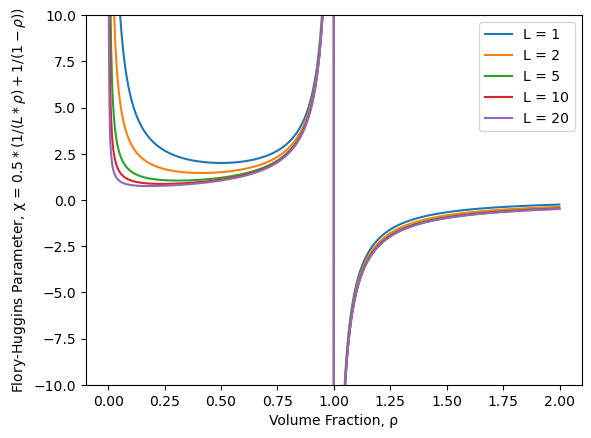

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#define Chi
def Chi(rho,L):
    return 0.5*(1/(L*rho)+1/(1-rho))

# Generate a range of rho values
rho_vals = np.linspace(0.001, 1.999, 1000)

L = [1,2,5,10,20]

for i in range(5):
# Calculate the corresponding chi values for each rho value

    chi_vals = []
    for rho in rho_vals:
        # Use the second derivative of the free energy to calculate chi
        chi = Chi(rho, L[i])
        chi_vals.append(chi)

    # Plot the spinodal curve
    plt.plot(rho_vals, chi_vals, label=f'L = {L[i]}')

# Add axis labels and legend
plt.xlabel('Volume Fraction, ρ')
plt.ylabel(f'Flory-Huggins Parameter, χ = $0.5*(1/(L*ρ)+1/(1-ρ))$')
plt.legend()
plt.ylim(-10,10)

# Show the plot
plt.show()


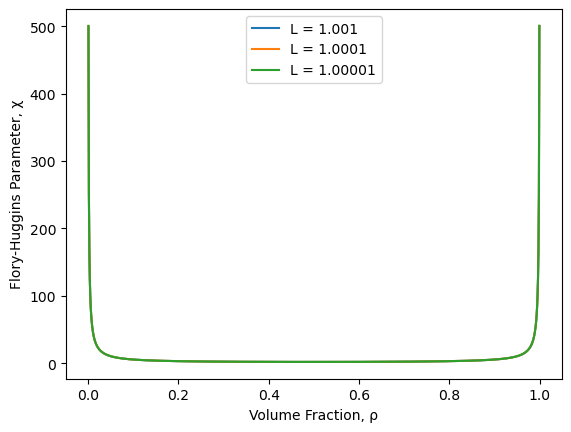

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#define Chi
def Chi(rho,L):
    return 0.5*((L*rho)**(-1)+(1-rho)**(-1))

# Generate a range of rho values
rho_vals = np.linspace(0.001, 0.999, 1000)

L = [1+ 1e-3,1+ 1e-4,1+ 1e-5]

for i in range(3):
# Calculate the corresponding chi values for each rho value

    chi_vals = []
    for rho in rho_vals:
        # Use the second derivative of the free energy to calculate chi
        chi = Chi(rho, L[i])
        chi_vals.append(chi)

    # Plot the spinodal curve
    plt.plot(rho_vals, chi_vals, label=f'L = {L[i]}')

# Add axis labels and legend
plt.xlabel('Volume Fraction, ρ')
plt.ylabel('Flory-Huggins Parameter, χ')
plt.legend()

# Show the plot
plt.show()


# Ich

In [43]:
#!/bin/env python3.7

# load custom modules required for CLR training
from modules.TransformerEncoder import Transformer
from modules.ContrastiveLosses import clr_loss,anomclr_loss,anomclr_plus_loss
from modules.EventLevelAnomalyAugmentations import rotate_events ,collinear_fill_jets

from modules.my_jet_augs import rotate_jets, distort_jets, rescale_pts, crop_jets, translate_jets, collinear_fill_jets, collinear_fill_jets_fast , shift_pT ,pt_reweight_jet, drop_constits_jet



# import args from extargs.py file
import My_Anom_extargs as args



# load standard python modules
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import roc_curve, auc

# load torch modules
import torch
import torch.nn as nn
import torch.nn.functional as F

#starting counter
t0 = time.time()

# initialise logfile
logfile = open("/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/Debugging/my_debug_logfile.txt", "a" )
print( "logfile initialised"   )

# set gpu device
device = torch.device( "cuda" if torch.cuda.is_available() else "cpu" )
print( "device: " + str( device )    )

#loading in data ------------------------------------------------------------

sys.path.insert(1, '/remote/gpu05/rueschkamp/projects/torch_datasets/')
from top_dataset import My_Dataset
from semi_dataset import SemiV_Dataset
from torch.utils.data import DataLoader


#starting training loader --------------------------------------
n_jets = 1e5
ratio = 0.2
n_constits = 50

training_set = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "qcd",
                                    usage= "training",
                                    number_constit=  n_constits,#args.n_constit,
                                    number_of_jets= n_jets,
                                    ratio = ratio
                                    )

dl_training = DataLoader(training_set,batch_size=args.batch_size, shuffle=True)

t1 = time.time()
print( "time taken to load and preprocess data: "+str( np.round( t1-t0, 2 ) ) + " seconds"    )


#initializing the network 
input_dim = 3 

net = Transformer( input_dim, args.model_dim, args.output_dim, args.n_heads, args.dim_feedforward, args.n_layers, args.learning_rate, args.n_head_layers, dropout=0.1, opt=args.opt )
# send network to device
net.to( device );

logfile initialised
device: cuda
time taken to load and preprocess data: 5.18 seconds


# .